# <font face = 'Impact' color = '#FFAEBC' > Sample Demonstration on Machine Learning for Regression<font/>
#### <font face = 'Times New Roman' color = '#B5E5CF'> License: GPL v3.0<font/>
#### <font face = 'Times New Roman' color = '#B5E5CF'> Author and Trainer: Paolo Hilado MSc. (Data Science)<font/>
This notebook provides a backgrounder in doing Machine Learning in Python employing models such as Ridge Regression, LASSO Regression, Elastic Net, and Random Forest Regressor.

#### <font face = 'Times New Roman' color = '#B5E5CF'> Name of Business Analyst: Riza June C. Espino<font/>
#### <font face = 'Times New Roman' color = '#B5E5CF'> Date of Accomplishment: November 21, 2025<font/>

# <font face = 'Palatino Linotype' color = '#5885AF'> Business Understanding:<font/>

The organization seeks to understand and predict the financial health and creditworthiness of businesses in order to make informed lending and investment decisions. Specifically, the objective is to predict a company’s CreditRiskScore — a quantitative measure of the likelihood of default or financial instability — based on historical financial, operational, and regional characteristics.

The dataset provided contains information on companies’ financial performance (AnnualRevenue, ProfitMargin), size and operational history (NumEmployees, YearsInOperation), prior financial behavior (HasPreviousDefaults, AvgMonthlyDebtObligation, CurrentLoanAmount), asset backing (CollateralValue), quality of financial reporting (FinancialStatementQuality), and contextual factors such as Industry and Region.

By building a regression model using these predictor variables, the organization aims to:
- Identify the key drivers of credit risk.
- Quantify the relationship between company characteristics and creditworthiness.
- Support data-driven lending decisions, risk assessment, and portfolio management.
- Reduce the likelihood of loan defaults and optimize capital allocation.

The business goal is therefore to develop a predictive model that accurately estimates the CreditRiskScore for each company, enabling management to make strategic financial decisions with greater confidence.

In [57]:
# Load the necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import pickle

In [27]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [58]:
# Load your dataset
df = pd.read_excel("credit_risk_score.xlsx")
# Check out the first few records
df.head()

,AnnualRevenue,ProfitMargin,NumEmployees,YearsInOperation,Industry,HasPreviousDefaults,AvgMonthlyDebtObligation,CurrentLoanAmount,CollateralValue,FinancialStatementQuality,Region,CreditRiskScore
0,5.372018e+06,16.996777,48,19,Healthcare,0,20384.398702,579814.337716,825939.405284,5,West,10.554537
1,2.846884e+06,14.623168,47,26,Manufacturing,0,29319.250061,507097.856107,93672.826723,4,East,67.298342
2,6.247479e+06,10.298152,50,26,Healthcare,0,22538.061802,548087.263041,809158.936975,3,North,11.682366
3,1.499204e+07,6.765316,37,25,Healthcare,1,14843.385363,767623.082354,932309.562351,5,North,0.000000
4,2.586579e+06,13.491117,57,26,Finance,0,4870.969105,501459.017855,54753.956543,3,North,68.996762


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   AnnualRevenue              1000 non-null   float64
 1   ProfitMargin               1000 non-null   float64
 2   NumEmployees               1000 non-null   int64  
 3   YearsInOperation           1000 non-null   int64  
 4   Industry                   1000 non-null   object 
 5   HasPreviousDefaults        1000 non-null   int64  
 6   AvgMonthlyDebtObligation   1000 non-null   float64
 7   CurrentLoanAmount          1000 non-null   float64
 8   CollateralValue            1000 non-null   float64
 9   FinancialStatementQuality  1000 non-null   int64  
 10  Region                     1000 non-null   object 
 11  CreditRiskScore            1000 non-null   float64
dtypes: float64(6), int64(4), object(2)
memory usage: 93.9+ KB


In [31]:
df.isnull().sum()

,0
AnnualRevenue,0
ProfitMargin,0
NumEmployees,0
YearsInOperation,0
Industry,0
HasPreviousDefaults,0
AvgMonthlyDebtObligation,0
CurrentLoanAmount,0
CollateralValue,0
FinancialStatementQuality,0


In [32]:
df.describe()

,AnnualRevenue,ProfitMargin,NumEmployees,YearsInOperation,HasPreviousDefaults,AvgMonthlyDebtObligation,CurrentLoanAmount,CollateralValue,FinancialStatementQuality,CreditRiskScore
count,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1.000000e+03,1000.000000,1000.000000
mean,6.093807e+06,10.354181,49.790000,24.570000,0.088000,20013.576462,4.998633e+05,5.832578e+05,3.028000,38.057442
std,1.242655e+07,4.987272,7.057741,14.078683,0.283437,7812.035797,2.013243e+05,2.569151e+05,1.425218,27.470532
min,1.278653e+05,-4.701943,31.000000,1.000000,0.000000,-7735.233255,-2.393244e+05,-2.564488e+05,1.000000,0.000000
25%,1.728085e+06,6.968792,45.000000,12.000000,0.000000,14648.558775,3.659646e+05,4.038677e+05,2.000000,10.445294
50%,3.377052e+06,10.315386,49.000000,24.000000,0.000000,20130.771012,5.061945e+05,5.918369e+05,3.000000,41.594607
75%,6.321342e+06,13.644411,54.250000,37.000000,0.000000,25360.640199,6.341132e+05,7.505980e+05,4.000000,59.788254
max,2.604668e+08,25.965538,74.000000,49.000000,1.000000,42391.836242,1.182837e+06,1.402192e+06,5.000000,100.000000


# <font face = 'Palatino Linotype' color = '#5885AF'> Data Understanding:<font/>
Provide a solid data understanding section for this mini-project.

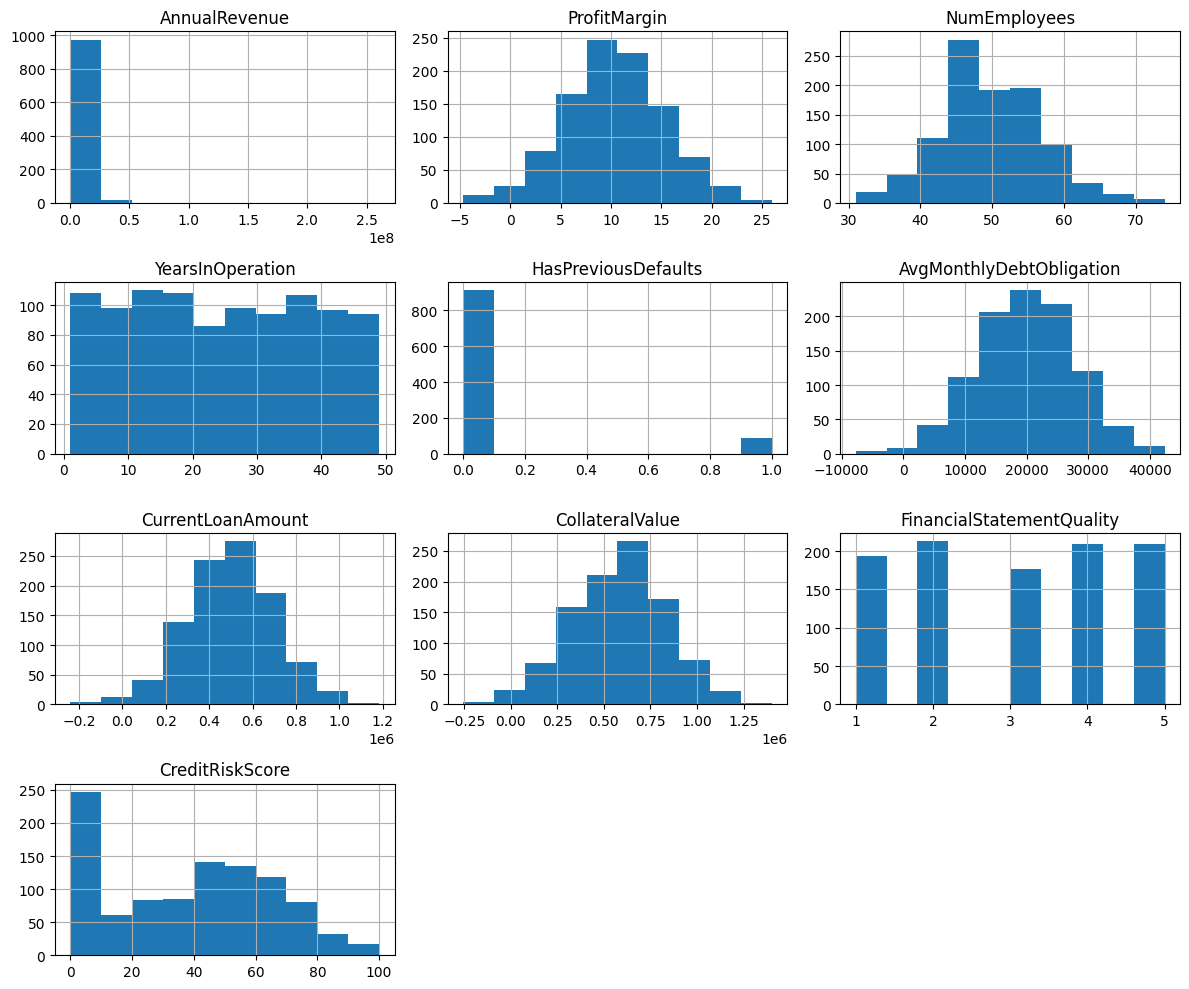

In [33]:
df.hist(figsize=(12,10))
plt.tight_layout()
plt.show()

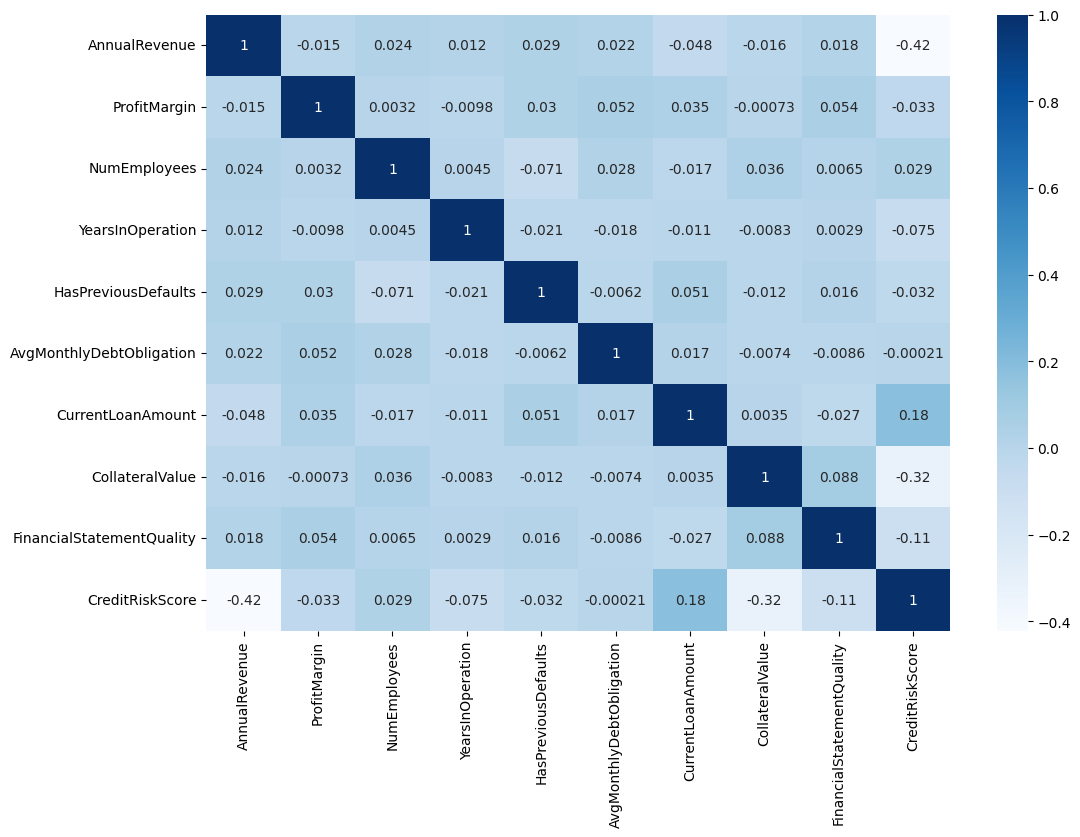

In [34]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="Blues")
plt.show()

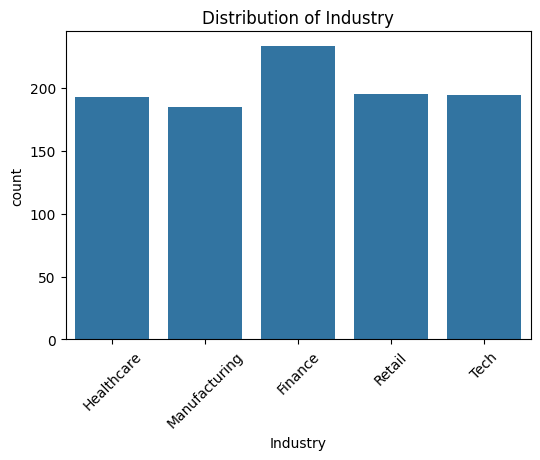

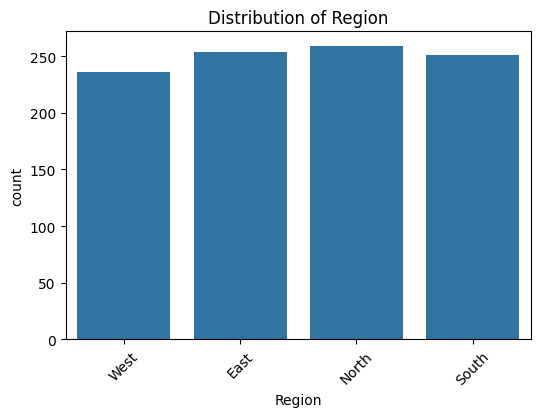

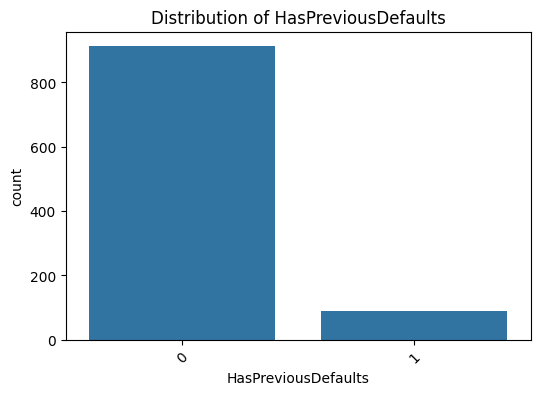

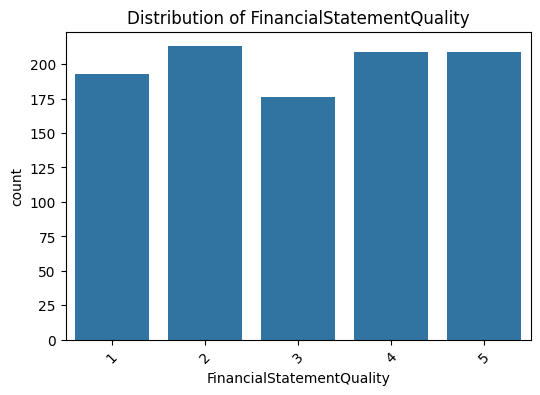

In [35]:
categorical_cols = ["Industry", "Region", "HasPreviousDefaults", "FinancialStatementQuality"]

for col in categorical_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x=col)
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
    plt.show()

# <font face = 'Palatino Linotype' color = '#5885AF'> Data Preparation:<font/>
Indicate your recipe for data explorationg and transformation in preparation for modelling.

In [60]:
target = "CreditRiskScore"

X = df.drop(columns=[target])
y = df[target]

numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

f"Numeric features: {numeric_features}"
f"Categorical features: {categorical_features}"

"Categorical features: ['Industry', 'Region']"

In [61]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

f"Training set size: {X_train.shape}"
f"Test set size: {X_test.shape}"

'Test set size: (200, 11)'

# <font face = 'Palatino Linotype' color = '#5885AF'> Modelling:<font/>
Train models such as Ridge, LASSO, Elastic Net, and Random Forest for this regression problem.
Perform K-fold Cross Validation (depending on the data size and the capacity of your machine, you may choose 5 or 10)
Choose the best model setup after hyperparameter tuning and upon comparison of its CV score. Check for overfitting comparing this to the Train score.
Check out the performance of the best model using the Test Score.

In [63]:
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)


results = {}


cv_folds = 5

##Modelling: Ridge Regression

In [64]:
ridge_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', Ridge())
])


In [65]:
ridge_params = {
    'regressor__alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}

ridge_grid = GridSearchCV(
    ridge_pipeline,
    ridge_params,
    cv=cv_folds,
    scoring='r2',
    n_jobs=-1
)

ridge_grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['AnnualRevenue',
                                                                          'ProfitMargin',
                                                                          'NumEmployees',
                                                                          'YearsInOperation',
                                                                          'HasPreviousDefaults',
                                                                          'AvgMonthlyDebtObligation',
                                                                          'CurrentLoanAmount',
                                                                          'CollateralValue',
                                                                          'FinancialStatementQuality']),
                                                                        ('cat',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         ['Industry',
                                                                          'Region'])])),
                                       ('regressor', Ridge())]),
             n_jobs=-1,
             param_grid={'regressor__alpha': [0.001, 0.01, 0.1, 1, 10, 100,
                                              1000]},
             scoring='r2')

In [66]:
results['Ridge'] = {
    'model': ridge_grid.best_estimator_,
    'best_params': ridge_grid.best_params_,
    'cv_score': ridge_grid.best_score_,
    'train_score': ridge_grid.best_estimator_.score(X_train, y_train),
    'test_score': ridge_grid.best_estimator_.score(X_test, y_test)
}

ridge_grid.best_params_, ridge_grid.best_score_, results['Ridge']['train_score'], results['Ridge']['test_score']

({'regressor__alpha': 100},
 np.float64(0.22038455526681128),
 0.34250526136190373,
 0.241848699945016)

##Modelling: Lasso Regression

In [68]:
lasso_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', Lasso(max_iter=10000))
])

lasso_params = {
    'regressor__alpha': [0.001, 0.01, 0.1, 1, 10, 100]
}

lasso_grid = GridSearchCV(
    lasso_pipeline,
    lasso_params,
    cv=cv_folds,
    scoring='r2',
    n_jobs=-1
)

lasso_grid.fit(X_train, y_train)

results['Lasso'] = {
    'model': lasso_grid.best_estimator_,
    'best_params': lasso_grid.best_params_,
    'cv_score': lasso_grid.best_score_,
    'train_score': lasso_grid.best_estimator_.score(X_train, y_train),
    'test_score': lasso_grid.best_estimator_.score(X_test, y_test)
}

lasso_grid.best_params_, lasso_grid.best_score_, results['Lasso']['train_score'], results['Lasso']['test_score']

({'regressor__alpha': 1},
 np.float64(0.19565351727281804),
 0.33264483129172484,
 0.258033215699508)

##Modelling: Elastic Net

In [69]:
elastic_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', ElasticNet(max_iter=10000))
])

elastic_params = {
    'regressor__alpha': [0.001, 0.01, 0.1, 1, 10],
    'regressor__l1_ratio': [0.2, 0.5, 0.7, 0.9]
}

elastic_grid = GridSearchCV(
    elastic_pipeline,
    elastic_params,
    cv=cv_folds,
    scoring='r2',
    n_jobs=-1
)

elastic_grid.fit(X_train, y_train)

results['ElasticNet'] = {
    'model': elastic_grid.best_estimator_,
    'best_params': elastic_grid.best_params_,
    'cv_score': elastic_grid.best_score_,
    'train_score': elastic_grid.best_estimator_.score(X_train, y_train),
    'test_score': elastic_grid.best_estimator_.score(X_test, y_test)
}

elastic_grid.best_params_, elastic_grid.best_score_, results['ElasticNet']['train_score'], results['ElasticNet']['test_score']

({'regressor__alpha': 1, 'regressor__l1_ratio': 0.5},
 np.float64(0.2316921583944171),
 0.2939963477106632,
 0.22911350846476897)

##Modelling: Random Forest

In [70]:
rf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

rf_params = {
    'regressor__n_estimators': [50, 100, 200],
    'regressor__max_depth': [10, 20, None],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 2, 4]
}

rf_grid = GridSearchCV(
    rf_pipeline,
    rf_params,
    cv=cv_folds,
    scoring='r2',
    n_jobs=-1,
    verbose=1
)

rf_grid.fit(X_train, y_train)

results['RandomForest'] = {
    'model': rf_grid.best_estimator_,
    'best_params': rf_grid.best_params_,
    'cv_score': rf_grid.best_score_,
    'train_score': rf_grid.best_estimator_.score(X_train, y_train),
    'test_score': rf_grid.best_estimator_.score(X_test, y_test)
}

rf_grid.best_params_, rf_grid.best_score_, results['RandomForest']['train_score'], results['RandomForest']['test_score']

Fitting 5 folds for each of 81 candidates, totalling 405 fits


({'regressor__max_depth': 10,
  'regressor__min_samples_leaf': 1,
  'regressor__min_samples_split': 2,
  'regressor__n_estimators': 200},
 np.float64(0.9417564879539249),
 0.9912992909579983,
 0.9538418392308953)

In [71]:
comparison_df = pd.DataFrame({
    'Model': list(results.keys()),
    'CV Score': [results[m]['cv_score'] for m in results.keys()],
    'Train Score': [results[m]['train_score'] for m in results.keys()],
    'Test Score': [results[m]['test_score'] for m in results.keys()]
})

comparison_df['Overfit_Check'] = comparison_df['Train Score'] - comparison_df['Test Score']
comparison_df

# Select best model based on CV score
best_model_name = comparison_df.loc[comparison_df['CV Score'].idxmax(), 'Model']
best_model = results[best_model_name]['model']

best_model_name, results[best_model_name]['best_params'], results[best_model_name]['cv_score'], results[best_model_name]['train_score'], results[best_model_name]['test_score']

('RandomForest',
 {'regressor__max_depth': 10,
  'regressor__min_samples_leaf': 1,
  'regressor__min_samples_split': 2,
  'regressor__n_estimators': 200},
 np.float64(0.9417564879539249),
 0.9912992909579983,
 0.9538418392308953)

In [72]:
y_pred = best_model.predict(X_test)

test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
test_mae = mean_absolute_error(y_test, y_pred)
test_r2 = r2_score(y_test, y_pred)

test_r2, test_rmse, test_mae

(0.9538418392308953, np.float64(5.9484215491134345), 4.327487624706719)

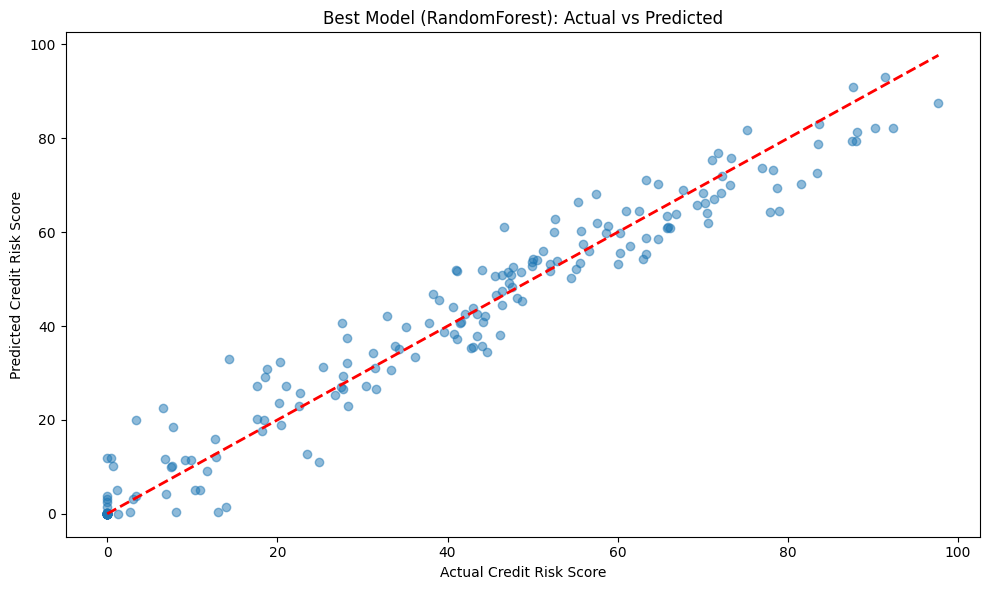

In [73]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Credit Risk Score')
plt.ylabel('Predicted Credit Risk Score')
plt.title(f'Best Model ({best_model_name}): Actual vs Predicted')
plt.tight_layout()
plt.show()

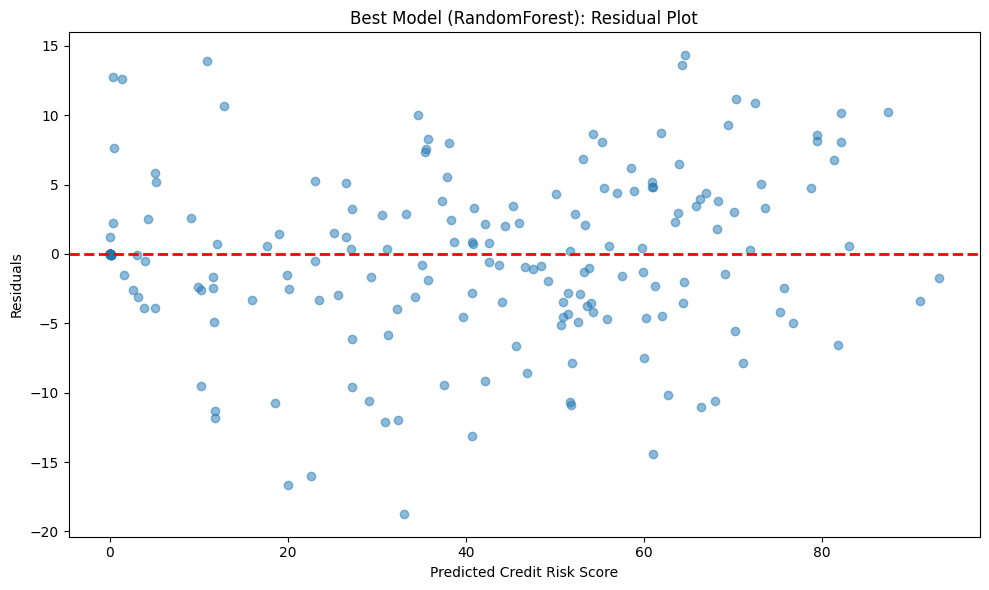

In [74]:
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--', lw=2)
plt.xlabel('Predicted Credit Risk Score')
plt.ylabel('Residuals')
plt.title(f'Best Model ({best_model_name}): Residual Plot')
plt.tight_layout()
plt.show()


# <font face = 'Palatino Linotype' color = '#5885AF'> Saving the Model for Future Deployment<font/>

In [76]:
# Save the best model
model_filename = f'best_credit_risk_model_{best_model_name.lower()}.pkl'
with open(model_filename, 'wb') as f:
    pickle.dump(best_model, f)

# Save all models for comparison
all_models_filename = 'all_credit_risk_models.pkl'
with open(all_models_filename, 'wb') as f:
    pickle.dump(results, f)